In [1]:
%%bigquery test
SELECT *
FROM `vertex-ai-sandbox-380023`.159092699.INFORMATION_SCHEMA.COLUMNS
where table_name="ga_sessions_20230327"

Query is running:   0%|          |

Downloading:   0%|          |

In [5]:
%%bigquery users_events_20230327
SELECT event_date, user_pseudo_id, count(event_timestamp) as unique_events
FROM `vertex-ai-sandbox-380023.analytics_250000498.events_20230327`
GROUP BY event_date, user_pseudo_id
order by event_date

Query is running:   0%|          |

Downloading:   0%|          |

In [32]:
%%bigquery users_events_20230326
SELECT event_date, user_pseudo_id, count(event_timestamp) as unique_events
FROM `vertex-ai-sandbox-380023.analytics_250000498.events_20230326`
GROUP BY event_date, user_pseudo_id
order by event_date

Query is running:   0%|          |

Downloading:   0%|          |

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
users_events.head()

,event_date,user_pseudo_id,unique_events
0,20230327,2072153368.1679348309,138
1,20230327,287160822.1679931978,47
2,20230327,452962893.1679912799,22
3,20230327,1047644544.1679952232,241
4,20230327,335392859.1679951786,33


In [33]:
users_events_20230327 = users_events.copy()

In [36]:
events_per_user = users_events_20230327.unique_events
events_per_user_26 = users_events_20230326.unique_events

In [35]:
events_per_user/np.ones(events_per_user.shape[0])

0         138.0
1          47.0
2          22.0
3         241.0
4          33.0
          ...  
593902      1.0
593903      1.0
593904      1.0
593905      1.0
593906      1.0
Name: unique_events, Length: 593907, dtype: Float64

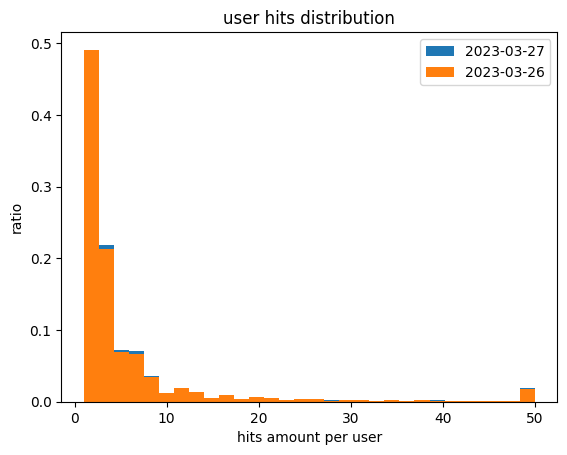

In [38]:
_, bins, _ = plt.hist(events_per_user.clip(upper=50), bins=30, label="2023-03-27", weights=np.ones(events_per_user.shape[0])/events_per_user.shape[0])
plt.hist(events_per_user_26.clip(upper=50), bins=bins, label="2023-03-26", weights=np.ones(events_per_user_26.shape[0])/events_per_user_26.shape[0])
plt.xlabel("hits amount per user")
plt.ylabel("ratio")
plt.title("user hits distribution")
plt.legend()
plt.show()

In [30]:
# amount of unique users per day

users_events.shape[0]

593907

In [31]:
# of users who has more than 50 hits per day

users_events[users_events["unique_events"] > 50].shape[0]/users_events.shape[0]*100

1.7504424093334476

In [42]:
ratio_27 = round(users_events[users_events["unique_events"] > 50].shape[0]/users_events.shape[0]*100, 2)
ratio_26 = round(users_events_20230326[users_events_20230326["unique_events"] > 50].shape[0]/users_events_20230326.shape[0]*100, 2)

In [43]:
print(f"{ratio_26}% users have more than 50 hits per day on 2023-03-26.")
print(f"{ratio_27}% users have more than 50 hits per day on 2023-03-27.")

1.74% users have more than 50 hits per day on 2023-03-26.
1.75% users have more than 50 hits per day on 2023-03-27.


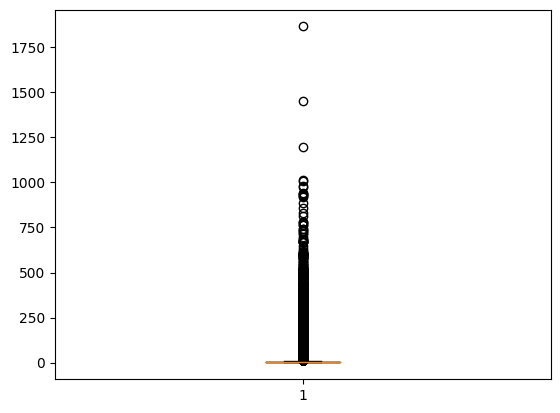

In [49]:
plt.boxplot(events_per_user_26[~users_events_20230326["user_pseudo_id"].isna()])
plt.show()

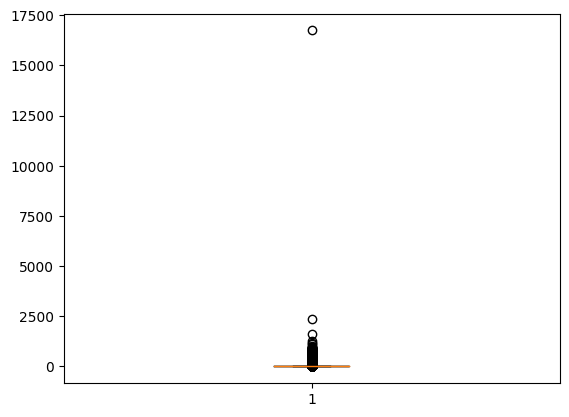

In [51]:
plt.boxplot(events_per_user[~users_events_20230327["user_pseudo_id"].isna()])
plt.show()

In [46]:
users_events_20230326[users_events_20230326["unique_events"] > 10000]

,event_date,user_pseudo_id,unique_events
84102,20230326,None,48875


In [48]:
users_events[users_events["unique_events"] > 5000]

,event_date,user_pseudo_id,unique_events
508966,20230327,None,50167
509017,20230327,957203704.1679873467,16736
